In [1]:
#Importing Various Libraries needed for the Project

import warnings
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly as po
import missingno as msno
import codecs
!pip install translate
from translate import Translator
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Importing pandas framework as pd
import pandas as pd
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#File Upload

from google.colab import files
uploaded = files.upload()
#df=pd.read_csv('/content/drive/MyDrive/AIML_Internship/Harsha/Python Notebook/Spam & Ham.csv',encoding='ISO-8859-1')

Saving Spam & Ham.csv to Spam & Ham.csv


In [4]:
#Declaring a dataframe df as a global dataframe so that the dataframe can be given values outside the main function

global df
df = pd.DataFrame()

In [5]:
#Reading the Input as CSV, JSON or a XML file and creating a dataframe

def csv_input(enc):
  if(enc != ""):
    d_df = pd.read_csv(f_name,encoding = enc)
  else:
    d_df = pd.read_csv(f_name)
  return d_df

def json_input(enc):
  if(enc != ""):
    d_df = pd.read_json(f_name,encoding = enc)
  else:
    d_df = pd.read_json(f_name,encoding = enc)
  return d_df

#def xml_input():


In [6]:
def get_input(f_name,enc):
  if f_name.endswith(".csv"):
    return csv_input(enc)
  elif(f_name.endswith(".json")):
    return json_input(enc)
  elif(f_name.endswith(".xml")):
    return xml_input(enc)

In [7]:
def data_head():
  return df.head()

def info_print():
  return df.info()

def describe_print():
  return df.describe()

def dtypes_print():
  return df.dtypes


In [8]:
def data_visualization():
  # No of Rows

  Rows = df.shape[0] 


  # No of Columns

  Columns = df.shape[1]


  print("Rows :", Rows)
  print("Columns :", Columns)


  # Column Names

  Column_Names = df.columns

In [9]:
def null_values():
  #To check for Missing Values

  #Visualizing Sea Born
  sb.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis');


In [10]:
def missing_values():
  #To check for Missing Values

  #Visualizing Sea Born
  sb.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis');



In [11]:
def msno_bargraph():
  msno.bar(df);

def msno_heatmap():
  msno.heatmap(df);

In [12]:
def null_val_rows():
  Rows = df.shape[0] 
  Columns = df.shape[1]


  # Find the Number of Rows that has Nan Value in it

  Null_Data = df.isnull().sum()
  print(Null_Data)

  #valuecons - check for better approach
  # List for storing the Null Column Names

  Null_Columns = []

  #check pandas dataframe for better approach - action tbd

  for i in range(len(Null_Data)):


    # If the number of Null Values in the Row is equal to the total number of Records, then it means that the whole column contains NUll value in it. 

    if Null_Data[i] == Rows - 1 or Null_Data[i] == Rows:
      
      Null_Columns.append(Column_Names[i])


  # Print all Columns which has only NULL values

  return Null_Columns

In [13]:
def del_col_null(Null_Columns):
  # Delete all NULL Columns which has only NULL values

  for i in Null_Columns:

    del df[i]


In [14]:
def row_null():
  # Display the Rows which has one or more NULL values in it

  print(df[df.isnull().any(axis=1)])

  df.dropna(inplace=True)
  df.reset_index(drop=True)

In [15]:
def drop_duplicate_rows():
  # Check if there is any Duplicate Rows

  duplicate = df[df.duplicated()]

  print("Number of Duplicate rows: ", duplicate.shape[0])
  

In [16]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
#Tokenization and Data Cleaning
#Regex Expression as Input####
#Rename all the functions according to the use case
import re
import string
class Data_Clean():

    def __init__(self):

        pass

    

    def stnd_prepro(self,text):
        text = str(text)

        text = text.lower()
        text = nltk.word_tokenize(text)
        
        
        removeword = ""
        y = []
        for i in text:
            if i.isalnum():
                y.append(i)
        
        text = y[:]
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation and i != removeword:
                y.append(i)
                
        text = y[:]
        y.clear()
        
        for i in text:
            y.append(ps.stem(i))
            
        return " ".join(y)
      
    def removedigits(self,text):
        text = str(text)
        pattern = r'[0-9]'
        text = re.sub(pattern, '', text)
        return text

    def removealphabets(self,text):
        text = str(text)
        pattern = r'[a-z | A-Z]'
        text = re.sub(pattern, '', text)
        return text
    
    def removealphanum(self,text):
        text = str(text)
        pattern = r'[0-9 | a-z | A-Z]'
        text = re.sub(pattern, '', text)
        return text
    
    def onlyalphanum(self,text):
        text = str(text)
        pattern = r'[\W_]+'
        text = re.sub(pattern, '', text)
        return text
      
    def enter_regex(self,text):
        text = str(text)
        pattern = input()
        text = re.sub(pattern, '', text)
        return text
    
    def remove_special(self,text):
        text = str(text)
        text = re.sub(r"[^a-zA-Z0-9 ]", "", text)
        return text

    def Clean(self, U_data):
      while(True):
        print("Please specify the Text Pre-Processing Methodologies to be done on the Dataset\n1 - Standard Preprocessing\n2 - Remove Digits\n3 - Remove Alphabets\n4 - Remove AlphaNum\n5 - Remove everything other than AlphaNum\n6 - Enter the Regex\n7 - Remove Special Characters\n8 - Break\nEnter your choice\n")
        ch = int(input())
        if(ch == 1):
          removeword = input("Enter a constant which has to be removed from the Dataset")

          C_Data = U_data.apply(self.stnd_prepro)
        elif(ch == 2):
          C_Data = U_data.apply(self.removedigits)
        elif(ch == 3):
          C_Data = U_data.apply(self.removealphabets)
        elif(ch == 4):
          C_Data = U_data.apply(self.removealphanum)
        elif(ch == 5):
          C_Data = U_data.apply(self.onlyalphanum)
        elif(ch == 6):
          C_Data = U_data.apply(self.enter_regex)
        elif(ch == 7):
          C_Data = U_data.apply(self.remove_special)
        else:
          break
        
        U_data = C_Data

      
      
      return C_Data

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
class Classification_Algo():

  def __init__(self):
        pass

  def knn(self,new_df):
    X = tfidf.fit_transform(new_df["Pre-Processed"].values.astype('U')).toarray()
    Y = new_df['spam'].values
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20)
    k = int(input("Enter the value of K"))
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    Y_pred = neigh.predict(X_test)
    print(confusion_matrix(Y_test, Y_pred))
    #self.algo_compute(neigh)

  def logistic(self,new_df):
    X = tfidf.fit_transform(new_df["Pre-Processed"].values.astype('U')).toarray()
    Y = new_df['spam'].values
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20)
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
    Y_pred = lr.predict(X_test)
    print(confusion_matrix(Y_test, Y_pred))
    #self.algo_compute(lr)

  def svm(self,new_df):
    X = tfidf.fit_transform(new_df["Pre-Processed"].values.astype('U')).toarray()
    Y = new_df['spam'].values
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 2 )
    clf = svm.SVC(kernel = 'linear')
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(confusion_matrix(Y_test, Y_pred))
    #self.algo_compute(clf)

  def naivebayes(self,new_df):
    X = tfidf.fit_transform(new_df["Pre-Processed"].values.astype('U')).toarray()
    Y = new_df['spam'].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, Y_train).predict(X_test)
    print(confusion_matrix(Y_test, y_pred))
    #self.algo_compute(gnb)
  
  def randomforest(self,new_df):
    X = tfidf.fit_transform(new_df['Pre-Processed'].values.astype('U')).toarray()
    Y = new_df['spam'].values
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 2 )
    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    print(confusion_matrix(Y_test, Y_pred))
    #self.algo_compute(clf)

  def Algo_Select(self, new_df):
    algo_ch = int(input("Enter the Classification Algorithm to be performed on the Dataset\n1 - KNN\n2 - Logistic Regression\n3 - SVM\n4 - Naive Bayes\n5 - Random Forest\nEnter your Choice:"))
    if(algo_ch == 1):
      self.knn(new_df)
    elif(algo_ch == 2):
      self.logistic(new_df)
    elif(algo_ch == 3):
      self.svm(new_df)
    elif(algo_ch == 4):
      self.naivebayes(new_df)
    elif(algo_ch == 5):
      self.randomforest(new_df)
    else:
      print("Wrong Choice")

    

In [19]:
!pip3 install ftfy
import ftfy
print(ftfy.fix_text("å°\x8fè´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸\x8då‡ºæ\x9d¥"))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.2 MB/s 
小贺,早上电脑开机开不出来


In [20]:
uploaded.keys()
                  
print("Welcome to Democratizing NLP - A No Code Framework")
f_ctr = 0
if(len(uploaded.keys()) > 1):
  print("You have uploaded more than One File. Specify the count of the file where you want the Pre-Processing to be done -")
  f_ctr = int(input()) - 1

print("If the file should be encoded in a particular format, Please enter Y and enter the encoding to the considered")
enc = input()
enc_val = ""
if(enc == "Y" or enc == 'y'):
  enc_val = input()

  
k_list = list(uploaded.keys())
f_name = k_list[f_ctr]

df = get_input(f_name,enc_val)


print(df) 

Welcome to Democratizing NLP - A No Code Framework
If the file should be encoded in a particular format, Please enter Y and enter the encoding to the considered
n
                                                  text  spam
0    Subject: naturally irresistible your corporate...     1
1    Subject: the stock trading gunslinger  fanny i...     1
2    Subject: unbelievable new homes made easy  im ...     1
3    Subject: 4 color printing special  request add...     1
4    Subject: do not have money , get software cds ...     1
..                                                 ...   ...
195  Subject: re : interview with enron corp . rese...     0
196  Subject: maddox  vince ,  here is michael madd...     0
197  Subject: re : scifinance  curt ,  thanks very ...     0
198  Subject: re : good morning  john ,  i shall se...     0
199  Subject: mgmt 656  here are your latest roster...     0

[200 rows x 2 columns]


In [21]:
#!pip install ftfy
for i,r  in enumerate(df["text"]):
  try:
    df.loc[i,"text"] = ftfy.fix_text(r)
  except:
    continue 

In [22]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
195,Subject: re : interview with enron corp . rese...,0
196,"Subject: maddox vince , here is michael madd...",0
197,"Subject: re : scifinance curt , thanks very ...",0
198,"Subject: re : good morning john , i shall se...",0


In [23]:
print(data_head())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [24]:
print(info_print())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    200 non-null    object
 1   spam    200 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB
None


In [25]:
print(describe_print())

            spam
count  200.00000
mean     0.49500
std      0.50123
min      0.00000
25%      0.00000
50%      0.00000
75%      1.00000
max      1.00000


In [26]:
print(dtypes_print())

text    object
spam     int64
dtype: object


In [27]:
df["spam"] = df["spam"].astype('category')

In [28]:
df.describe()

,text,spam
count,200,200
unique,200,2
top,Subject: naturally irresistible your corporate...,0
freq,1,101


To be Done: 10/Aug
- Data Visualization (Null val and Duplicate Val) - * - Completed
- Detect various languages (lang detect package, FastText API FB) - Completed
- Translation - Completed
- Visualization based on language 
- Mojibakes (Speacial Char) Encoding issues and issues to fix encoding(before lang detection) - * - FTFY - Completed
- while importing mention the encoding.... optional parameter while reading dataset.- * Completed
- Stop Word Removal - Data Cleaning - Ser - Completed

In [29]:
data_visualization()

Rows : 200
Columns : 2


Check if the Dataframe contains Null Values

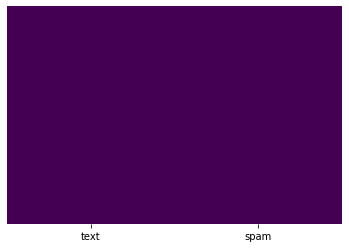

In [30]:
null_values() #remove the charts

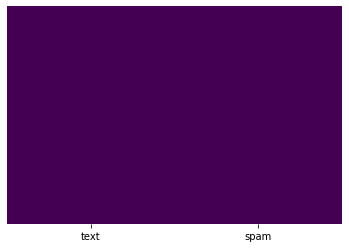

In [31]:
missing_values()

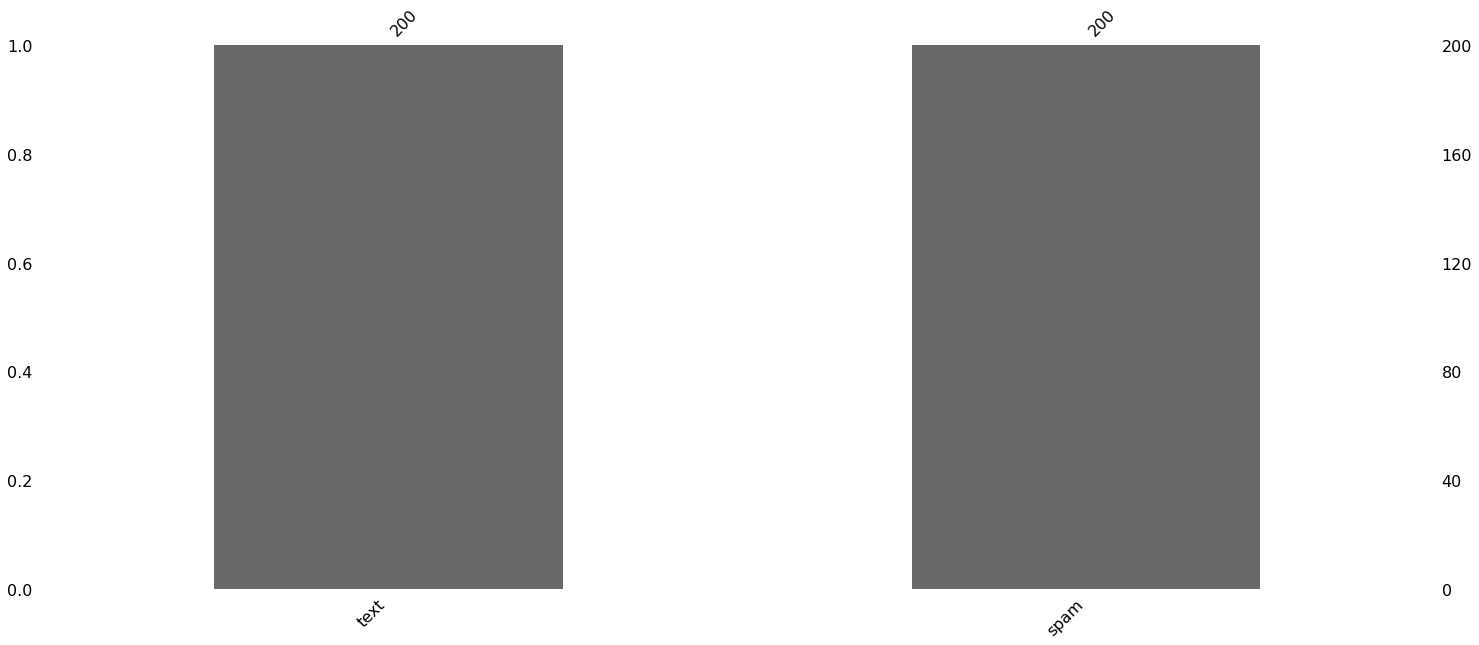

In [32]:
msno_bargraph()

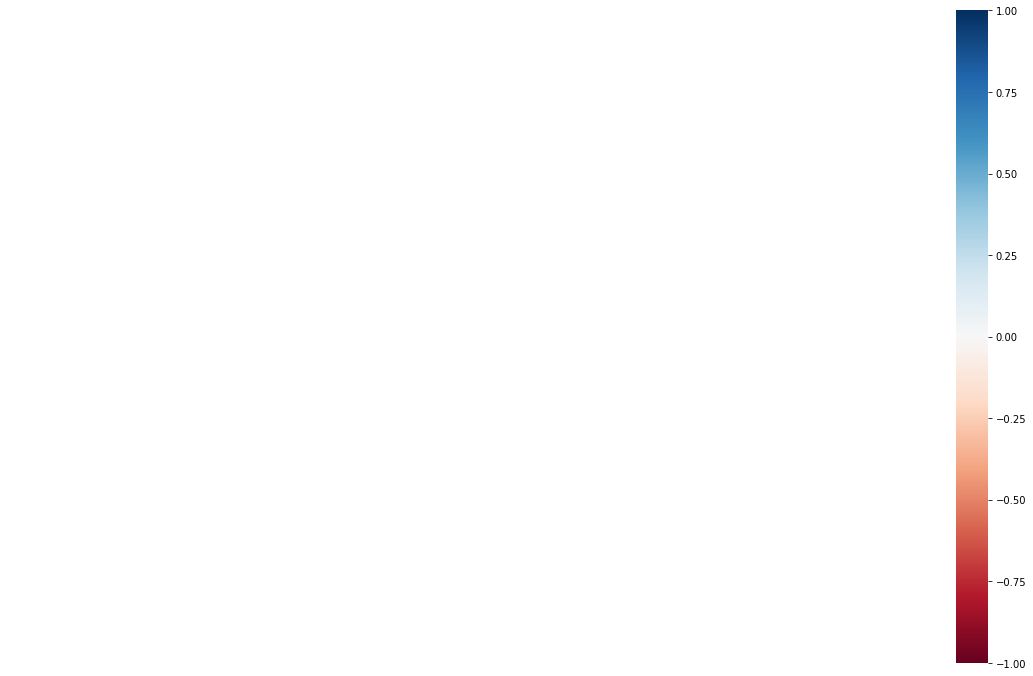

In [33]:
msno_heatmap()

In [34]:
#Null Value Rows

# Find the Number of Rows that has Nan Value in it
df.isnull().sum()

Null_Columns = null_val_rows()

text    0
spam    0
dtype: int64


In [35]:
df.columns

Index(['text', 'spam'], dtype='object')

Dropping Columns with Null Values


In [36]:
del_col_null(Null_Columns)

In [37]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [38]:
row_null()

Empty DataFrame
Columns: [text, spam]
Index: []


In [39]:
df.isnull().any()

text    False
spam    False
dtype: bool

Dropping Duplicate Rows

In [40]:
df.shape

(200, 2)

In [41]:
# Check if there is any Duplicate Rows

duplicate = df[df.duplicated()]

print("Number of Duplicate rows: ", duplicate.shape[0])

Number of Duplicate rows:  0


In [42]:
df.count()

text    200
spam    200
dtype: int64

In [43]:
# Drop all the Duplicate Rows

df = df.drop_duplicates()
df.reset_index(drop=True)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
195,Subject: re : interview with enron corp . rese...,0
196,"Subject: maddox vince , here is michael madd...",0
197,"Subject: re : scifinance curt , thanks very ...",0
198,"Subject: re : good morning john , i shall se...",0


In [44]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
195,Subject: re : interview with enron corp . rese...,0
196,"Subject: maddox vince , here is michael madd...",0
197,"Subject: re : scifinance curt , thanks very ...",0
198,"Subject: re : good morning john , i shall se...",0


In [45]:
df.count()

text    200
spam    200
dtype: int64

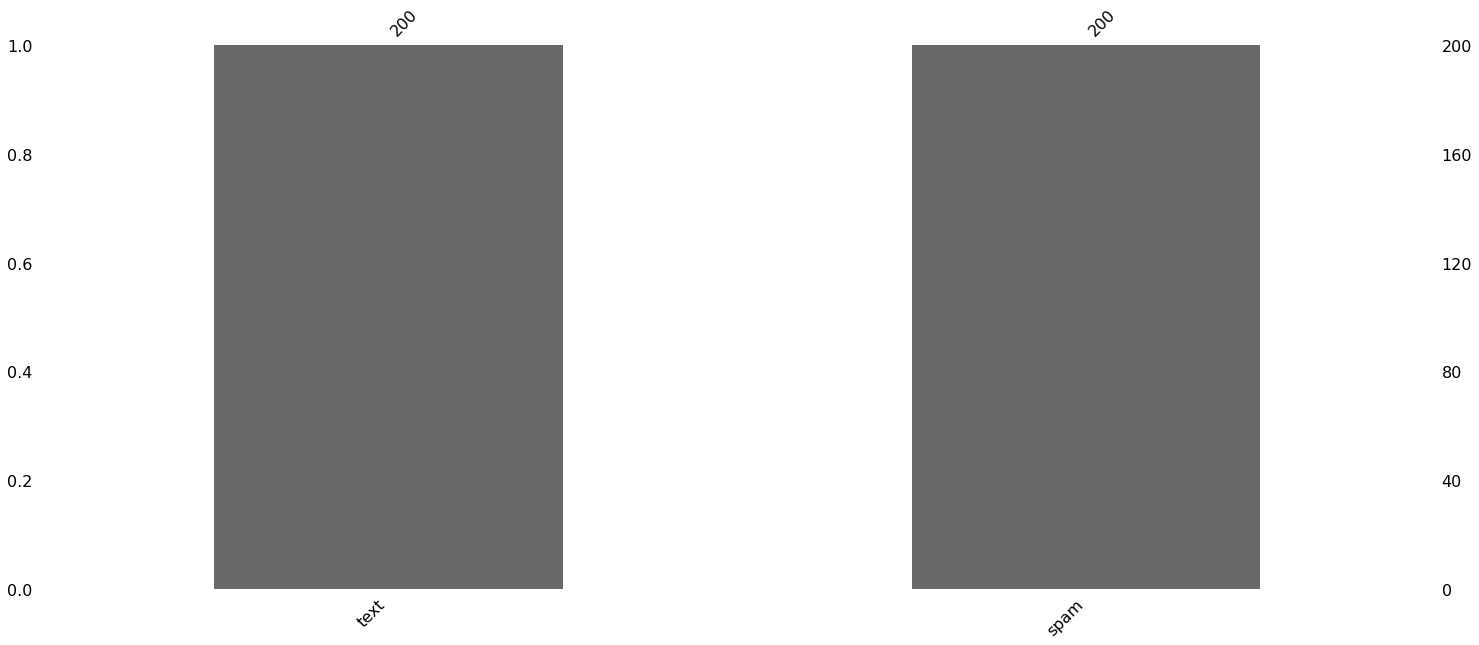

In [46]:
# Plot the MSNO Bar Graph to find the number of NULL values

msno.bar(df); #matplotlib/seaborn can be used

In [47]:
df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0      101    101  Subject: telephone interview with the research...    1
1       99     99  Subject: naturally irresistible your corporate...    1

In [48]:
df=df.replace('\*','',regex=True)  #Replace Special Characters with Null Value
df['text'] = df['text'].str.replace('\d+', '') #Replace digits

In [49]:
!pip install langdetect
from langdetect import detect
for i,r  in enumerate(df["text"]):
  try:
    #print(r)
    df.loc[i,"language"] = detect(r)
    #print(detect(r))
  except:
    df.loc[i,"language"] = "NA"

#log - language cannot be detected - logger package 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=676ae24b886f991d2cee7aeb46c794140587a1ac382d241662c76935ead6ddd0
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [50]:
import pickle
dbfile = open('/content/drive/MyDrive/abc.pkl','wb')
      
# source, destination
pickle.dump(df, dbfile)                     
dbfile.close()

In [51]:
dbfile = open('/content/drive/MyDrive/abc.pkl','rb')     
new_df = pickle.load(dbfile)
dbfile.close()
#Detect the language
#Language Visualization and Percent

In [52]:
new_df.head()

,text,spam,language
0,Subject: naturally irresistible your corporate...,1,en
1,Subject: the stock trading gunslinger fanny i...,1,en
2,Subject: unbelievable new homes made easy im ...,1,en
3,Subject: color printing special request addi...,1,en
4,"Subject: do not have money , get software cds ...",1,en


In [53]:
lang_dist = new_df["language"].value_counts() #Use for Visualization and Lang Conversion.. loop condition - check if en
type(lang_dist)

pandas.core.series.Series

Text(0.5, 1.0, 'Distribution of Languages Present in the Dataset')

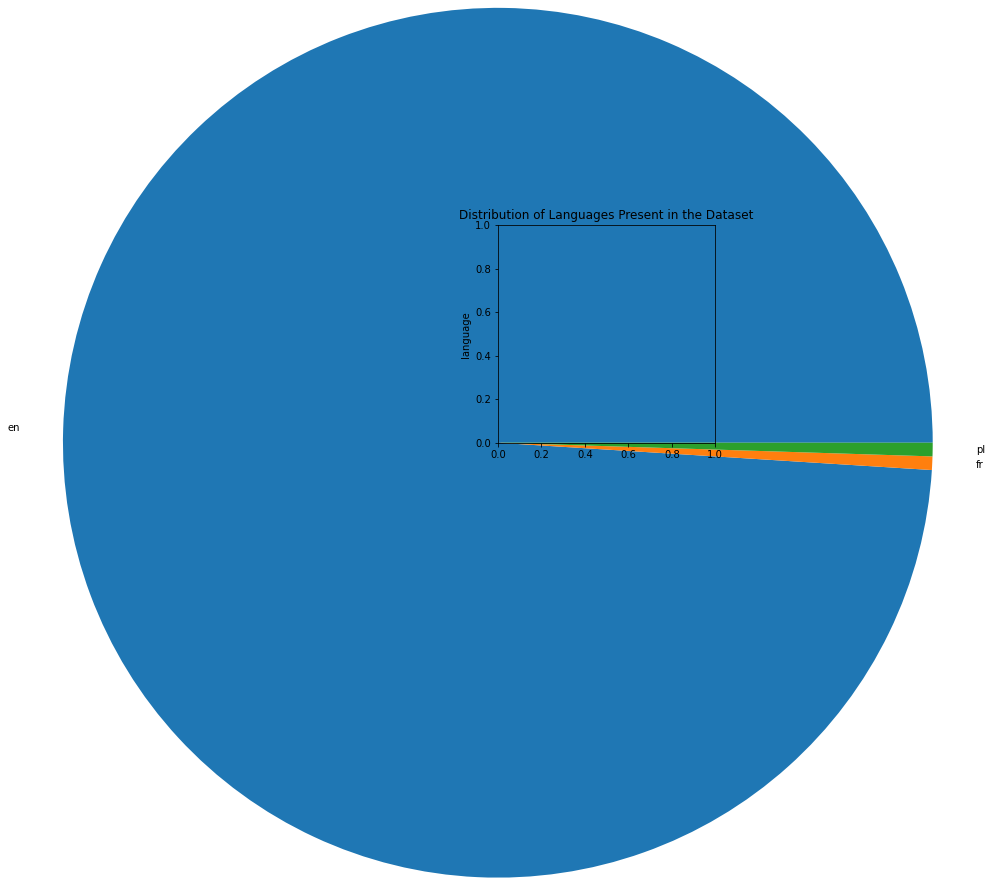

In [54]:
ax = new_df["language"].value_counts().plot(kind='pie',radius=2, frame=True)
ax.set_title("Distribution of Languages Present in the Dataset") #excluding the most used language
#2 visualization - one with english, one without english

In [55]:
langdist = pd.DataFrame(new_df["language"].value_counts())
langdist.reset_index(inplace = True)
langdist.rename(columns = {'index':'Detected lang'}, inplace = True)
langdist.rename(columns = {'language':'count'}, inplace = True)

In [56]:
langdist

,Detected lang,count
0,en,198
1,fr,1
2,pl,1


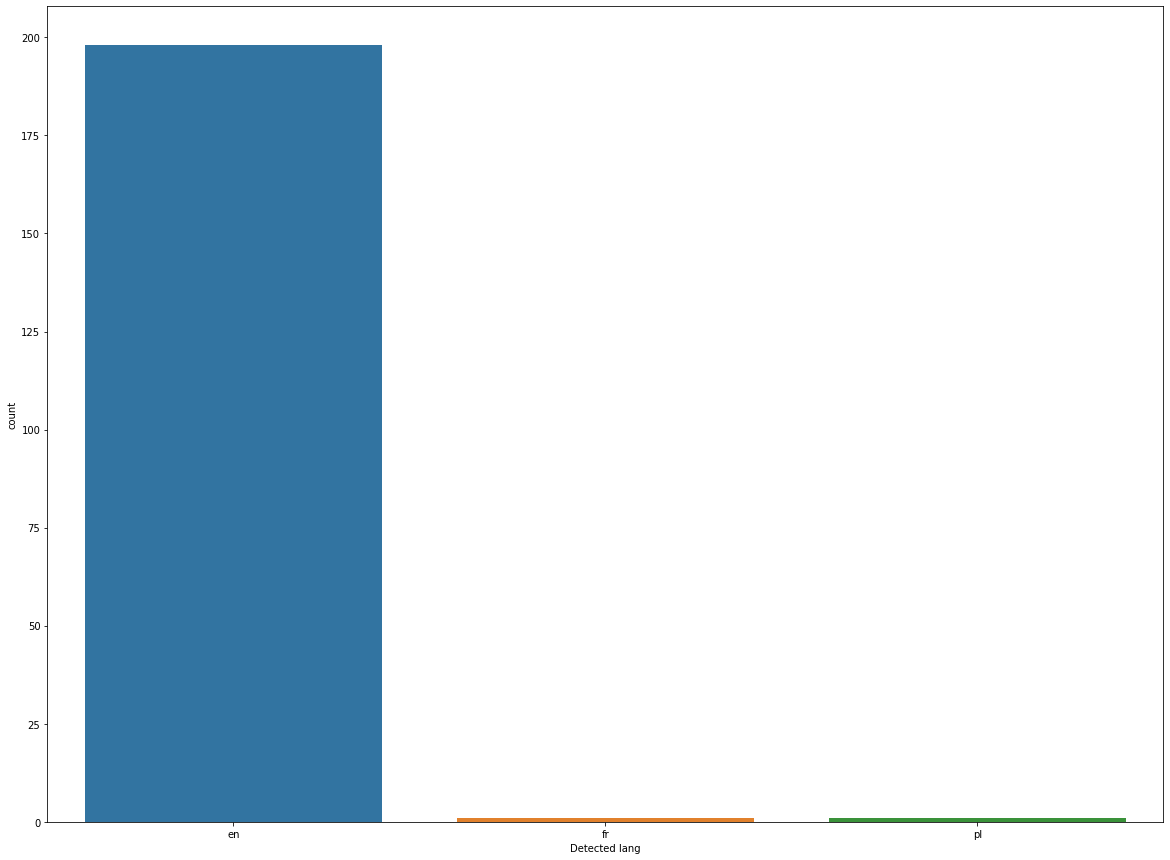

In [57]:
plt.figure(figsize=(20, 15))
ax = sb.barplot(x =langdist["Detected lang"], y = langdist["count"])
#remove english

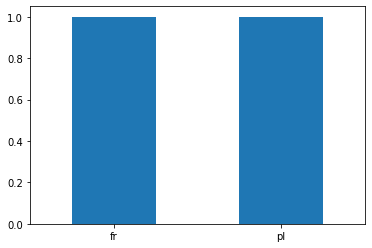

In [58]:
#Seaborn - plt.figure(figsize=(20, 15))
A = new_df["language"].value_counts()
A = A.drop(labels=["en"])
by = A.plot.bar(x='lab', y='val', rot=0)
#Parameters to be changed


In [59]:

print("Do you wish to translate the text")
tr = input()
if(tr == "yes" or tr == "y"):
  fromlang = input("Enter the language of the given text")
  tolang = input("Enter the language to which the given text has to be translated")
  translator= Translator(to_lang=tolang)
  print(translator.translate("How do you do?"))
  for i,r  in enumerate(df["text"]):
    try:
        df.loc[i,"translation"] = translator.translate(r)
    except:
      df.loc[i,"translation"] = "Unable to Translate"
#language.valuecounts() use



Do you wish to translate the text
n


In [60]:
df

,text,spam,language
0,Subject: naturally irresistible your corporate...,1,en
1,Subject: the stock trading gunslinger fanny i...,1,en
2,Subject: unbelievable new homes made easy im ...,1,en
3,Subject: color printing special request addi...,1,en
4,"Subject: do not have money , get software cds ...",1,en
...,...,...,...
195,Subject: re : interview with enron corp . rese...,0,en
196,"Subject: maddox vince , here is michael madd...",0,en
197,"Subject: re : scifinance curt , thanks very ...",0,en
198,"Subject: re : good morning john , i shall se...",0,en


In [61]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
df1 = df.copy()

In [63]:
df1.isnull().any()
df1.dropna(inplace=True)
df1.reset_index(drop=True)

,text,spam,language
0,Subject: naturally irresistible your corporate...,1,en
1,Subject: the stock trading gunslinger fanny i...,1,en
2,Subject: unbelievable new homes made easy im ...,1,en
3,Subject: color printing special request addi...,1,en
4,"Subject: do not have money , get software cds ...",1,en
...,...,...,...
195,Subject: re : interview with enron corp . rese...,0,en
196,"Subject: maddox vince , here is michael madd...",0,en
197,"Subject: re : scifinance curt , thanks very ...",0,en
198,"Subject: re : good morning john , i shall se...",0,en


In [64]:
df1.tail()

,text,spam,language
195,Subject: re : interview with enron corp . rese...,0,en
196,"Subject: maddox vince , here is michael madd...",0,en
197,"Subject: re : scifinance curt , thanks very ...",0,en
198,"Subject: re : good morning john , i shall se...",0,en
199,Subject: mgmt here are your latest rosters ....,0,en


In [65]:
#pip install langdetect
#df1 = df.copy()
#from langdetect import detect
#for i,r  in enumerate(df1["text"]):
  #df1.loc[int(i),"language"] = detect(r)


Stop Words Removal

In [66]:
Cleaned_Data = Data_Clean()

df['Pre-Processed'] = Cleaned_Data.Clean(df['text'])

Please specify the Text Pre-Processing Methodologies to be done on the Dataset
1 - Standard Preprocessing
2 - Remove Digits
3 - Remove Alphabets
4 - Remove AlphaNum
5 - Remove everything other than AlphaNum
6 - Enter the Regex
7 - Remove Special Characters
8 - Break
Enter your choice

1
Enter a constant which has to be removed from the Datasetcon
Please specify the Text Pre-Processing Methodologies to be done on the Dataset
1 - Standard Preprocessing
2 - Remove Digits
3 - Remove Alphabets
4 - Remove AlphaNum
5 - Remove everything other than AlphaNum
6 - Enter the Regex
7 - Remove Special Characters
8 - Break
Enter your choice

8


In [67]:
df

,text,spam,language,Pre-Processed
0,Subject: naturally irresistible your corporate...,1,en,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,en,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,en,subject unbeliev new home made easi im want sh...
3,Subject: color printing special request addi...,1,en,subject color print special request addit info...
4,"Subject: do not have money , get software cds ...",1,en,subject money get softwar cd softwar compat gr...
...,...,...,...,...
195,Subject: re : interview with enron corp . rese...,0,en,subject interview enron corp research dear shi...
196,"Subject: maddox vince , here is michael madd...",0,en,subject maddox vinc michael maddox contact inf...
197,"Subject: re : scifinance curt , thanks very ...",0,en,subject scifin curt thank much ye time fine ex...
198,"Subject: re : good morning john , i shall se...",0,en,subject good morn john shall see christi tomor...


In [68]:
#NER
#USE SPACY
!pip install transformers
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
NER = pipeline("ner", model=model, tokenizer=tokenizer)
print("Enter the line in the Dataset where Named Entity Recognition has to be done")
ln = int(input())
print(df.iloc[ln].at["Pre-Processed"])
result = NER("Hello World")
print(result)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.0 MB/s 
     |████████████████████████████████| 182 kB 40.6 MB/s 
     |████████████████████████████████| 7.6 MB 56.5 MB/s 


Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433M [00:00<?, ?B/s]

Enter the line in the Dataset where Named Entity Recognition has to be done
25
subject guzzl like fountain spur rock custom speak girlfriend realli enjoy make homemad erot film get pretend like porn star even though ever two us see one thing realli miss movi money shot frank lucki money shot worth dollar order spur home movi end gigant cum shot would make even veteran porn star jealou thank spur help spice sex life anthoni ky spur realli work improv sperm motil morpholog point girlfriend pregnant fertil blend realli help improv male fertil sperm qualiti adam j san francisco usa http karla choral com spur sheep need disturb go http romano choral com rm php
[{'entity': 'B-ORG', 'score': 0.9928664, 'index': 1, 'word': 'Hello', 'start': 0, 'end': 5}, {'entity': 'I-ORG', 'score': 0.98718125, 'index': 2, 'word': 'World', 'start': 6, 'end': 11}]


In [69]:
!pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-11-17 04:06:13.368049: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 3.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [70]:
#OPTION CAN BE GIVEN
import spacy
  
nlp = spacy.load('en_core_web_sm')
  
sentence = df.iloc[2].at["text"]
print(sentence)
  
doc = nlp(sentence)
print(doc)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $  ,  home loan at a  .  fixed rate .  this offer is being extended to you unconditionally and your credit is in no way a factor .  to take advantage of this limited time opportunity  all we ask is that you visit our website and complete  the  minute post approval form  look foward to hearing from you ,  dorcas pittman
Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $  ,  home loan at a  .  fixed rate .  this offer is being extended to you unconditionally and your credit is in no way a factor .  to take advantage of this limited time opportunity  all we ask is that you visit our website and complete  the  minute post approval form  look foward to hearing from you ,  dorcas pittman


Regex as User Input - Completed
Give some constants - remove special char etc, and also user i/p
analysis on dataset - visual - Completed
Pre-processing : User can enter what he wants to remove. eg: monday - Completed
Visualization of Language - Completed
Translation of non English - TBDone
NER can be a text box - tbd
Word Embeddings - Completed
N-Grams
Remove Biase from Dataset - Completed

In [71]:
new_df["spam"].value_counts()

0    101
1     99
Name: spam, dtype: int64

In [72]:
spam_df = df[df["spam"] == 1]
ham_df = df[df["spam"] == 0]
ham_df = ham_df.head(2021)
cc = [spam_df,ham_df]
new_df = pd.concat(cc)
#IDEAL WAY - smote - best way : cost based learning - implement cost based learning

In [73]:
new_df

,text,spam,language,Pre-Processed
0,Subject: naturally irresistible your corporate...,1,en,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,en,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,en,subject unbeliev new home made easi im want sh...
3,Subject: color printing special request addi...,1,en,subject color print special request addit info...
4,"Subject: do not have money , get software cds ...",1,en,subject money get softwar cd softwar compat gr...
...,...,...,...,...
195,Subject: re : interview with enron corp . rese...,0,en,subject interview enron corp research dear shi...
196,"Subject: maddox vince , here is michael madd...",0,en,subject maddox vinc michael maddox contact inf...
197,"Subject: re : scifinance curt , thanks very ...",0,en,subject scifin curt thank much ye time fine ex...
198,"Subject: re : good morning john , i shall se...",0,en,subject good morn john shall see christi tomor...


In [74]:
!pip install --upgrade gensim
from gensim.models import Word2Vec, FastText
corpus = []
for col in df["Pre-Processed"]:
   word_list = col.split(" ")
   corpus.append(word_list)
print(corpus)
#show first value
corpus[0:1]

#generate vectors from corpus
model = Word2Vec(corpus, min_count=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 4.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
[['subject', 'natur', 'irresist', 'corpor', 'ident', 'lt', 'realli', 'hard', 'recollect', 'compani', 'market', 'full', 'suqgest', 'inform', 'isoverwhelminq', 'good', 'catchi', 'logo', 'stylish', 'statloneri', 'outstand', 'websit', 'make', 'task', 'much', 'easier', 'promis', 'havinq', 'order', 'iogo', 'compani', 'automaticaili', 'becom', 'world', 'ieader', 'isguit', 'ciear', 'without', 'good', 'product', 'effect', 'busi', 'organ', 'practic', 'aim', 'hotat', 'nowaday', 'market', 'promis', 'market', 'effort', 'becom', 'much', 'effect', 'list', 'clear', 'benefit', 'creativ', 'hand', 'made', 'origin', 'logo', 'special', 'done', 'reflect', 'distinct', 'compani', 'imag', 'conveni', 'logo',

In [75]:
#explore embeddings using cosine similarity
model.wv.most_similar('hard')

model.wv.most_similar_cosmul(positive = ['phone', 'number'], negative = ['call'])

model.wv.doesnt_match("market full suggest".split())

#save embeddings
#file = 'email_embd.txt'
#model.wv.save_word2vec_format(filename, binary = False)

'suggest'

In [76]:
df #word cloud analysis and n gram analysis [top 15 can be displayed] bar plot/histogram for showing

,text,spam,language,Pre-Processed
0,Subject: naturally irresistible your corporate...,1,en,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,en,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,en,subject unbeliev new home made easi im want sh...
3,Subject: color printing special request addi...,1,en,subject color print special request addit info...
4,"Subject: do not have money , get software cds ...",1,en,subject money get softwar cd softwar compat gr...
...,...,...,...,...
195,Subject: re : interview with enron corp . rese...,0,en,subject interview enron corp research dear shi...
196,"Subject: maddox vince , here is michael madd...",0,en,subject maddox vinc michael maddox contact inf...
197,"Subject: re : scifinance curt , thanks very ...",0,en,subject scifin curt thank much ye time fine ex...
198,"Subject: re : good morning john , i shall se...",0,en,subject good morn john shall see christi tomor...


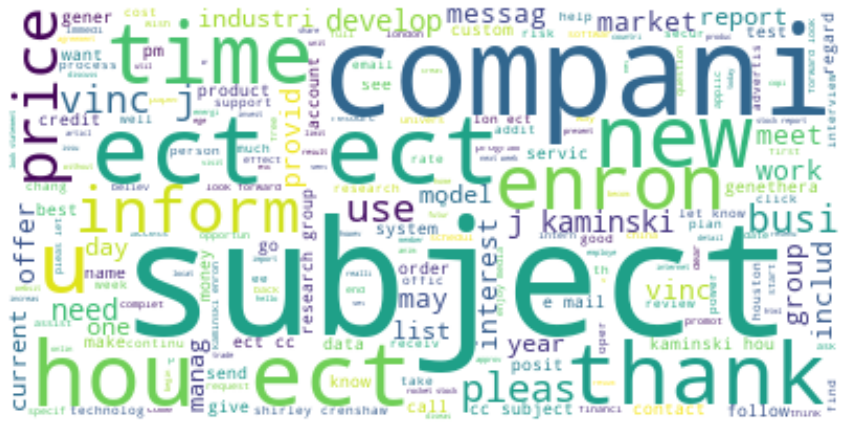

In [77]:
#Word Cloud Representation
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
text = " ".join(i for i in df["Pre-Processed"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
def get_top_n_ngrams(corpus, top_n=None, ngram_range=(1,1)):
    #vec = CountVectorizer(ngram_range=ngram_range,stop_words=x_stopwords).fit(corpus)
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

In [125]:
#grams
top_n = int(input("Enter the number of n grams to be plotted on graph"))
ngram_range = (2,2)
uni_grams = get_top_n_ngrams(new_df["Pre-Processed"], top_n, ngram_range)
unigram_df = pd.DataFrame(uni_grams, columns = ['Unigrams' , 'count'])
#plot top 20

Enter the number of n grams to be plotted on graph10


In [126]:
unigram_df #plot the bar graph for the n gram analysis

,Unigrams,count
0,ect ect,105
1,hou ect,97
2,vinc kaminski,81
3,enron com,46
4,cc subject,42
5,kaminski hou,38
6,research group,35
7,ect cc,34
8,shirley crenshaw,32
9,would like,31


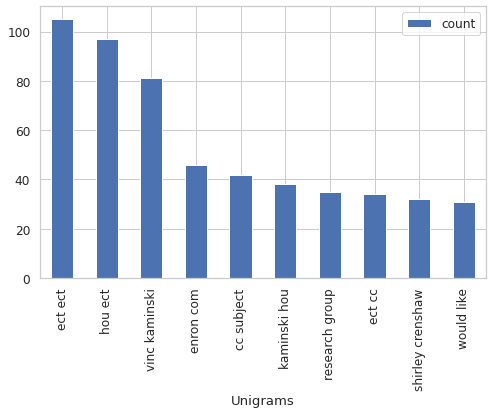

In [127]:
unigram_df.plot.bar(x = "Unigrams", y = "count")

In [83]:
!pip install -q streamlit
!./ngrok authtokens 2F4bGMFlIjyJYeOQzXER2wsN9XT_4jjNe1UZyUiEddyXQHn8H
!pip install pyngrok

     |████████████████████████████████| 9.2 MB 5.3 MB/s 
     |████████████████████████████████| 182 kB 57.7 MB/s 
     |████████████████████████████████| 237 kB 31.0 MB/s 
     |████████████████████████████████| 164 kB 53.7 MB/s 
     |████████████████████████████████| 4.7 MB 38.9 MB/s 
     |████████████████████████████████| 78 kB 4.3 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 51 kB 5.7 MB/s 
/bin/bash: ./ngrok: No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 4.9 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=11095b2bb0a7961d77f855d9756c17c0fbe1446840fec1a59481e321c2bf8e9d
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [84]:
from pyngrok import ngrok 

In [85]:
from pyngrok import ngrok 
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://98a0-34-70-236-12.ngrok.io" -> "http://localhost:80">

In [86]:
%%writefile streamlit_app.py 
st.markdown(""" This is a Streamlit App """)

Writing streamlit_app.py


In [87]:
!streamlit run /content/streamlit_app.py & npx localtunnel —-port 8501

[..................] / rollbackFailedOptional: verb npm-session 7c8179772202734


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.70.236.12:8501

npx: installed 22 in 5.638s
Usage: lt --port [num] <options>

Options:
  -p, --port                Internal HTTP server port                 [required]
  -h, --host                Upstream server providing forwarding
                                             [default: "https://localtunnel.me"]
  -s, --subdomain           Request this subdomain
  -l, --local-host          Tunnel traffic to this host instead of localhost,
                            override Host header to this host
      --local-https         Tunnel traffic to a local HTTPS server     [boolean]
      --local-cert          Path to certificate PEM file for local HTTPS server
      --local-key           Path to certificate key file for local HTTPS server
      --local-ca            Path to certificate auth

In [88]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [89]:
Classification = Classification_Algo()
Classification.Algo_Select(new_df)
#new_df.apply(Classification.Algo_Select)

Enter the Classification Algorithm to be performed on the Dataset
1 - KNN
2 - Logistic Regression
3 - SVM
4 - Naive Bayes
5 - Random Forest
Enter your Choice:1
Enter the value of K1
[[21  1]
 [ 2 16]]


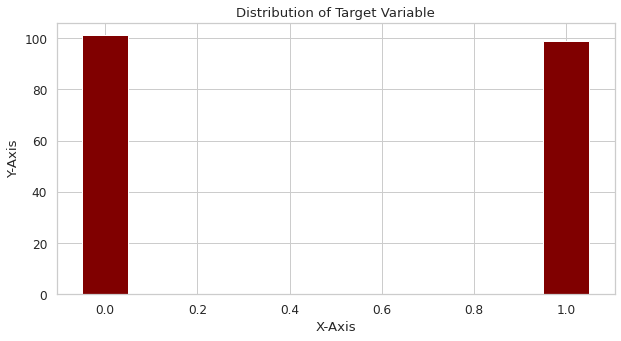

In [124]:
values = new_df['spam'].value_counts().keys().tolist()
counts = new_df['spam'].value_counts().tolist()
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(values, counts, color ='maroon',
        width = 0.1)
 
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Distribution of Target Variable")
plt.show()